# Mini proyecto 2
María Ferrnanda López -17160
Ana Lucía Hernández - 17138

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

## Función acumulada ponderada

$F(x)= \sum \limits _{i=1} ^{n} p_{i} F_{i}(x)$

#### Algoritmo para generar V

1. Encontrar un valor para n
2. Definir la función de probabilidad acumulada $F_{i}(x)$ para i de 1 hasta n
3. Generar una constante H tal que,esta se encuentre entre el dominio de los enteros positivos y que cumpla con: $P(I = i)= p_{i}$
4. Para todod los valores posibles evaluar:
    Si $I=i$ entonces:
    obtener $Y_{i}$ a partir de $F_{i} (x)$
5. Asignar X como $Y_{i}$
6. Repetir pasos 3 y 4 para todo los valores de I y así obtener la variable aleatoria


#### Demostración de algoritmo

$P(X ≤ x)= \sum \limits _{i=1} ^{n} P(X ≤ x│I = i)P(I = i)$
$P(X ≤ x)= \sum \limits _{i=1} ^{n} P(Y_{i} ≤ x)P(I = i)$
$P(X ≤ x)= \sum \limits _{i=1} ^{n} F_{i}(x)p_{i} $
$P(X ≤ x)=  F_{i} (x) $

## Valor presente neto

In [5]:
## funcion para generar variables aleatorias normales - tomada de ejemplo en clase 
def varNormal(mu, sigma):
    while True:
        lambdav = 1
        y1 = -(1/lambdav) * math.log(random.random())
        y2 = -(1/lambdav) * math.log(random.random())
        if (y2 - ((y1 - 1) ** 2) / 2) > 0:
            y1 = y2 - ((y1 - 1) ** 2) / 2
            x = random.random()
            if x <= 0.5:
                return mu + sigma * y1
            else:
                return mu - sigma * y1
    

In [21]:
#simulacion se aplica la formula de vpn 
def simulacionHotel(iters, retorno):
    sims = []
    for x in range(iters):
        vpn = -800
        vpn += varNormal(-800,50) / ((1 + retorno) ** 1) 
        vpn += varNormal(-800,100) / ((1 + retorno) ** 2) 
        vpn += varNormal(-700,150) / ((1 + retorno) ** 3) 
        vpn += varNormal(300,200) / ((1 + retorno) ** 4) 
        vpn += varNormal(400,200) / ((1 + retorno) ** 5) 
        vpn += varNormal(500,200) / ((1 + retorno) ** 6) 
        vpn += np.random.uniform(200,8440) / ((1 + retorno) ** 7)
        sims.append(vpn)
    
    plt.hist(sims, bins=10)
    title = 'Histograma Hotel ' + str(iters) + ' iteraciones'
    plt.xlabel('Valor',fontsize=15)
    plt.ylabel('Frecuencia',fontsize=15)
    plt.title(title)
    plt.show()
    
    return sims

In [22]:
def simulacionMall(iters, retorno):
    sims = []
    for x in range(iters):
        vpn = -900
        vpn += varNormal(-600,50) / ((1 + retorno) ** 1) 
        vpn += varNormal(-200,50) / ((1 + retorno) ** 2)
        vpn += varNormal(-600,100) / ((1 + retorno) ** 3) 
        vpn += varNormal(250,150) / ((1 + retorno) ** 4) 
        vpn += varNormal(350,150) / ((1 + retorno) ** 5) 
        vpn += varNormal(400,150) / ((1 + retorno) ** 6) 
        vpn += np.random.uniform(1600,6000) / ((1 + retorno) ** 7) 
        sims.append(vpn)
    plt.hist(sims, bins=10, color="orange")
    title = 'Histograma Centro Comercial ' + str(iters) + ' iteraciones'
    plt.xlabel('Valor',fontsize=15)
    plt.ylabel('Frecuencia',fontsize=15)
    plt.title(title)
    plt.show()
    
    return sims

In [33]:
def comparacionResultados(iters, simsH, simsC):
    h = 0 
    cc = 0

    for sim in simsH:
        if sim > 0:
            h = h + 1

    for sim in simsC:
        if sim > 0:
            cc = cc + 1 

    print("Para la simulacion de 100 iteraciones el Hotel fue rentable en una cantidad de :",h," -- ", h*100/iters,"%")
    print("Para la simulacion de 100 iteraciones del Centro Comerical fue rentable una cantidad de :",cc," -- ", cc*100/iters,"%")
    

### Simulacion para 100

#### Hotel

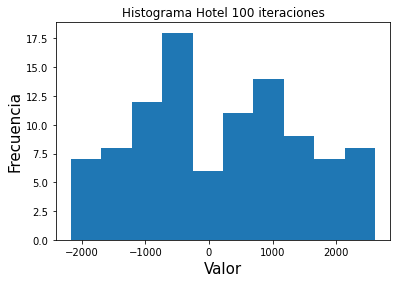

In [25]:
simsHotel1 = simulacionHotel(100, 0.1)

#### Centro Comercial

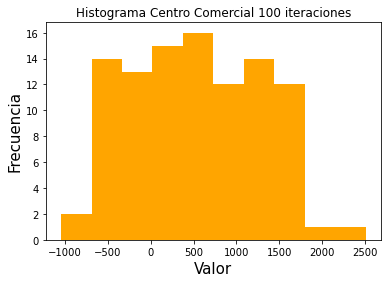

In [26]:
simsMall1 = simulacionMall(100, 0.1)

### Simulacion 1000

#### Hotel

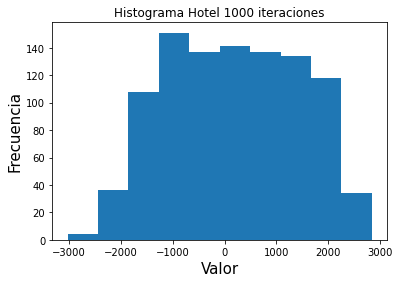

In [27]:
simsHotel2 = simulacionHotel(1000, 0.1)

#### Centro Comercial

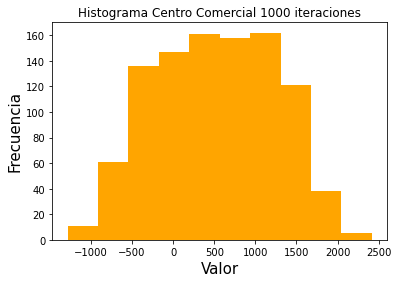

In [28]:
simsMall2 = simulacionMall(1000, 0.1)

### Simualacion 10000

#### Hotel

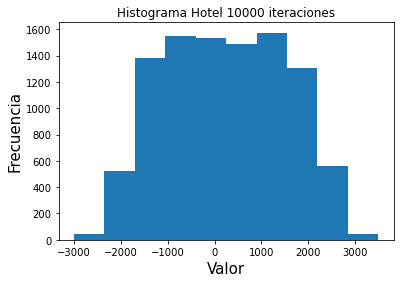

In [30]:
simsHotel3 = simulacionHotel(10000, 0.1)

#### Centro Comercial

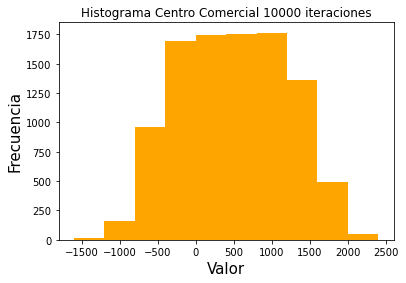

In [31]:
simsMall3 = simulacionMall(10000, 0.1)

### Analisis de resultados de VPN por cada proyecto

In [34]:
comparacionResultados(100, simsHotel1, simsMall1)

Para la simulacion de 100 iteraciones el Hotel fue rentable en una cantidad de : 53  --  53.0 %
Para la simulacion de 100 iteraciones del Centro Comerical fue rentable una cantidad de : 73  --  73.0 %


In [35]:
comparacionResultados(1000, simsHotel2, simsMall2)

Para la simulacion de 100 iteraciones el Hotel fue rentable en una cantidad de : 542  --  54.2 %
Para la simulacion de 100 iteraciones del Centro Comerical fue rentable una cantidad de : 721  --  72.1 %


In [36]:
comparacionResultados(10000, simsHotel3, simsMall3)

Para la simulacion de 100 iteraciones el Hotel fue rentable en una cantidad de : 5524  --  55.24 %
Para la simulacion de 100 iteraciones del Centro Comerical fue rentable una cantidad de : 7161  --  71.61 %


Es más rentable invertir en el proyecto del centro comercial, ya que se puede observar que los porcentajes en los que un vpn sera más alto o mayor a 0, es mayor a comparación del proyecto del hotel en el cual no logra aumentar de un 55%